In [1]:
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from skimage.feature import plot_matches

from utils import *

%load_ext autoreload
%autoreload 2

In [2]:
SAMPLE_NUMBER = 1

In [3]:
PATH       : Path = Path.cwd()/"samples"/str(SAMPLE_NUMBER)  # directory of the images
IMG_FORMAT : str  = "jpg"                                    # e.g. jpg/jpeg/png...
OUTPATH = PATH/'output'
OUTPATH.mkdir(exist_ok=True, parents=True)

IMAGES = [cv2.imread(str(p)) for p in sorted([x for x in PATH.iterdir() if x.suffix == ".jpg"])]
assert len(IMAGES) == 2, "There must be exactly two images in the directory"

In [4]:
im1, im2 = IMAGES[0], IMAGES[1]
hpts1 = ANMS(*harris_points(im1))
hpts2 = ANMS(*harris_points(im2))

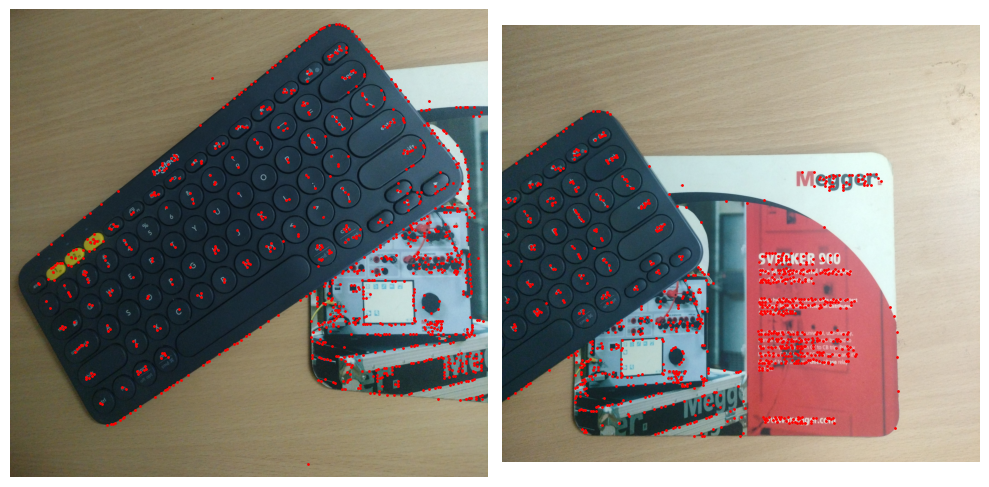

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
ax[0].scatter(hpts1[:, 1], hpts1[:, 0], s=1, c='r')
ax[1].scatter(hpts2[:, 1], hpts2[:, 0], s=1, c='r')
ax[0].axis('off')
ax[1].axis('off')
fig.tight_layout()

In [6]:
desc1 = get_descriptors(im1, hpts1)
desc2 = get_descriptors(im2, hpts2)
matched = match_descriptors(desc1, desc2)
mpts1 = hpts1[matched[:, 0]]
mpts2 = hpts2[matched[:, 1]]


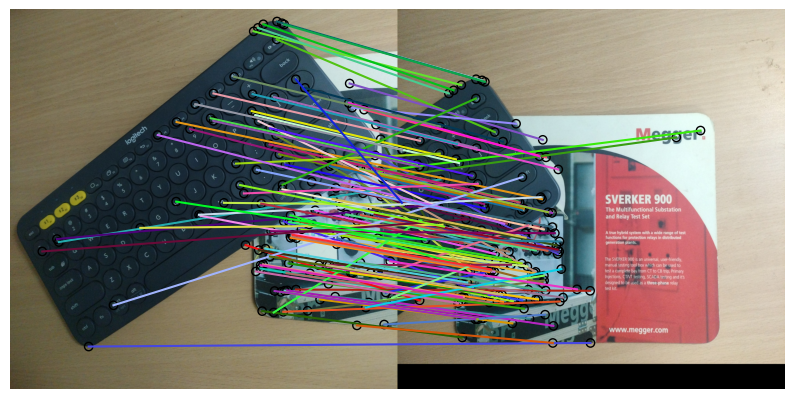

In [7]:
# plot the mappings on the images
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.axis('off')
plot_matches(ax, 
             cv2.cvtColor(im1, cv2.COLOR_BGR2RGB), 
             cv2.cvtColor(im2, cv2.COLOR_BGR2RGB), 
             mpts1, mpts2, 
            np.tile(np.arange(len(mpts1)), (2, 1)).T)


In [8]:
H, inliers = RANSAC2(mpts1, mpts2)
inliers

61

In [12]:
final_img = merge_2images(im1, im2, H, method='linear')

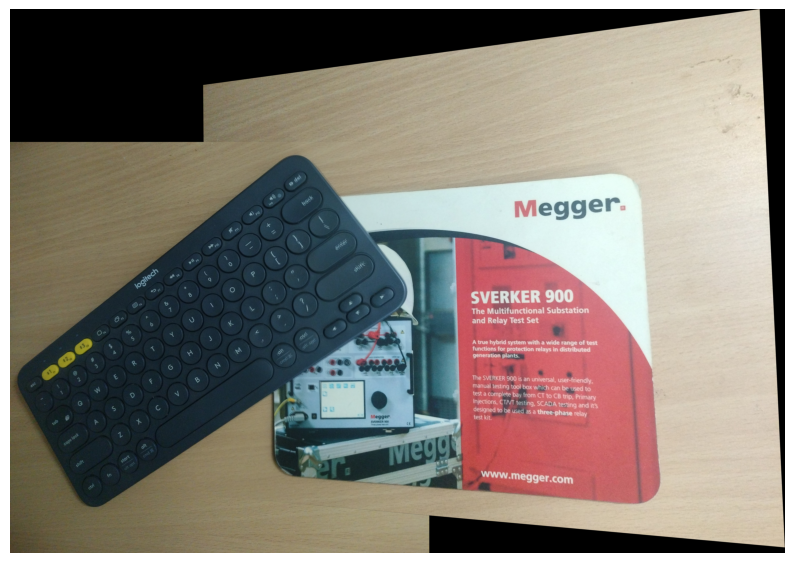

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.axis('off');

In [14]:
cv2.imwrite(str(OUTPATH/'auto2.jpg'), final_img)

True